# USAD

## Environment

In [1]:
!rm -r sample_data

rm: cannot remove 'sample_data': No such file or directory


In [2]:
!git clone https://github.com/manigalati/usad

In [3]:
%cd usad

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn

from utils import *
from usad import *

In [2]:
!nvidia-smi -L

device = get_default_device()

GPU 0: NVIDIA GeForce RTX 2080 Ti (UUID: GPU-8c3ec378-b5aa-02ea-3284-98c6ddf4d6a9)
GPU 1: NVIDIA GeForce RTX 2080 Ti (UUID: GPU-a786105b-bc1a-1b78-aa09-d00e6a99a314)
GPU 2: NVIDIA GeForce RTX 2080 Ti (UUID: GPU-75328635-694c-7af1-c1ba-3cf3f699970b)
GPU 3: NVIDIA GeForce RTX 2080 Ti (UUID: GPU-7a754337-4d14-e796-2438-84047afd7add)
GPU 4: NVIDIA GeForce RTX 2080 Ti (UUID: GPU-088fbfc0-fbe1-bdd5-acd1-da77d5c64704)
GPU 5: NVIDIA GeForce RTX 2080 Ti (UUID: GPU-695bc41b-a216-eb37-52fd-01530b2909b4)
GPU 6: NVIDIA GeForce RTX 2080 Ti (UUID: GPU-f354148f-7893-5a85-e2c5-57d6c81ce67d)
GPU 7: NVIDIA GeForce RTX 2080 Ti (UUID: GPU-631f3c56-4049-0714-0afc-f39b27b49f2b)


## EDA - Data Pre-Processing

### Download dataset

In [5]:
!mkdir input
#normal period
!python gdrivedl.py https://drive.google.com/open?id=1rVJ5ry5GG-ZZi5yI4x9lICB8VhErXwCw input/
#anomalies
!python gdrivedl.py https://drive.google.com/open?id=1iDYc0OEmidN712fquOBRFjln90SbpaE7 input/

mkdir: cannot create directory ‘input’: File exists
input/SWaT_Dataset_Normal_v1.csv [Exists]
input/SWaT_Dataset_Attack_v0.csv [Exists]


### Normal period

In [6]:
#Read data
normal = pd.read_csv("input/SWaT_Dataset_Normal_v1.csv")#, nrows=1000)
normal = normal.drop(["Timestamp" , "Normal/Attack" ] , axis = 1)
normal.shape

/tmp/ipykernel_410416/3202893291.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  normal = pd.read_csv("input/SWaT_Dataset_Normal_v1.csv")#, nrows=1000)


(495000, 51)

In [8]:
normal.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,0,"124,3135",1,1,1,"251,9226","8,313446","312,7916",0,1,...,0,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1
1,0,"124,392",1,1,1,"251,9226","8,313446","312,7916",0,1,...,0,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1
2,0,"124,4705",1,1,1,"251,9226","8,313446","312,7916",0,1,...,0,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1
3,0,"124,6668",1,1,1,"251,9226","8,313446","312,7916",0,1,...,0,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1
4,0,"124,5098",1,1,1,"251,9226","8,313446","312,7916",0,1,...,0,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1


In [9]:
# Transform all columns into float64
for i in list(normal): 
    normal[i]=normal[i].apply(lambda x: str(x).replace("," , "."))
normal = normal.astype(float)

In [10]:
normal

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,0.000000,124.3135,1.0,1.0,1.0,251.9226,8.313446,312.7916,0.000000,1.0,...,0.000000,1.0,1.0,9.100231,0.000000,3.3485,0.000256,1.0,1.0,1.0
1,0.000000,124.3920,1.0,1.0,1.0,251.9226,8.313446,312.7916,0.000000,1.0,...,0.000000,1.0,1.0,9.100231,0.000000,3.3485,0.000256,1.0,1.0,1.0
2,0.000000,124.4705,1.0,1.0,1.0,251.9226,8.313446,312.7916,0.000000,1.0,...,0.000000,1.0,1.0,9.100231,0.000000,3.3485,0.000256,1.0,1.0,1.0
3,0.000000,124.6668,1.0,1.0,1.0,251.9226,8.313446,312.7916,0.000000,1.0,...,0.000000,1.0,1.0,9.100231,0.000000,3.3485,0.000256,1.0,1.0,1.0
4,0.000000,124.5098,1.0,1.0,1.0,251.9226,8.313446,312.7916,0.000000,1.0,...,0.000000,1.0,1.0,9.100231,0.000000,3.3485,0.000256,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494995,2.460366,523.0430,2.0,2.0,1.0,262.0161,8.396437,328.5055,2.442316,2.0,...,0.308619,2.0,1.0,250.817100,1.778105,189.8552,0.000128,1.0,1.0,1.0
494996,2.448836,522.9645,2.0,2.0,1.0,262.0161,8.396437,328.5055,2.442316,2.0,...,0.308619,2.0,1.0,250.817100,1.778105,189.5027,0.000128,1.0,1.0,1.0
494997,2.434744,522.8860,2.0,2.0,1.0,262.0161,8.396437,328.6337,2.444879,2.0,...,0.308619,2.0,1.0,250.817100,1.778105,189.5027,0.000128,1.0,1.0,1.0
494998,2.428338,522.9252,2.0,2.0,1.0,262.0161,8.396437,328.6337,2.445391,2.0,...,0.308619,2.0,1.0,250.817100,1.649953,189.5027,0.000128,1.0,1.0,1.0


#### Normalization

In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

x = normal.values
x_scaled = min_max_scaler.fit_transform(x)
normal = pd.DataFrame(x_scaled)

In [12]:
normal.head(2)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.0,0.005294,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
1,0.0,0.005407,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0


### Attack

In [13]:
#Read data
attack = pd.read_csv("input/SWaT_Dataset_Attack_v0.csv",sep=";")#, nrows=1000)
labels = [ float(label!= 'Normal' ) for label  in attack["Normal/Attack"].values]
attack = attack.drop(["Timestamp" , "Normal/Attack" ] , axis = 1)
attack.shape

/tmp/ipykernel_410416/12158840.py:2: DtypeWarning: Columns (1,9,28,46) have mixed types. Specify dtype option on import or set low_memory=False.
  attack = pd.read_csv("input/SWaT_Dataset_Attack_v0.csv",sep=";")#, nrows=1000)


(449919, 51)

In [18]:
len(labels)

449919

In [14]:
# Transform all columns into float64
for i in list(attack):
    attack[i]=attack[i].apply(lambda x: str(x).replace("," , "."))
attack = attack.astype(float)
attack.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,2.427057,522.8467,2.0,2.0,1.0,262.0161,8.396437,328.6337,2.445391,2.0,...,0.307786,2.0,1.0,250.8652,1.649953,189.5988,0.000128,1.0,1.0,1.0
1,2.446274,522.8860,2.0,2.0,1.0,262.0161,8.396437,328.6337,2.445391,2.0,...,0.307786,2.0,1.0,250.8652,1.649953,189.6789,0.000128,1.0,1.0,1.0
2,2.489191,522.8467,2.0,2.0,1.0,262.0161,8.394514,328.6337,2.442316,2.0,...,0.308619,2.0,1.0,250.8812,1.649953,189.6789,0.000128,1.0,1.0,1.0
3,2.534350,522.9645,2.0,2.0,1.0,262.0161,8.394514,328.6337,2.442316,2.0,...,0.308619,2.0,1.0,250.8812,1.649953,189.6148,0.000128,1.0,1.0,1.0
4,2.569260,523.4748,2.0,2.0,1.0,262.0161,8.394514,328.6337,2.443085,2.0,...,0.308619,2.0,1.0,250.8812,1.649953,189.5027,0.000128,1.0,1.0,1.0


#### Normalization

In [15]:
from sklearn import preprocessing

x = attack.values 
x_scaled = min_max_scaler.transform(x)
attack = pd.DataFrame(x_scaled)

In [16]:
attack.head(2)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.884144,0.577133,1.0,1.0,0.0,0.496158,0.188845,0.064088,0.982899,1.0,...,0.970903,1.0,0.0,0.946125,0.449782,0.944116,0.000073,0.0,0.0,0.0
1,0.891145,0.577190,1.0,1.0,0.0,0.496158,0.188845,0.064088,0.982899,1.0,...,0.970903,1.0,0.0,0.946125,0.449782,0.944521,0.000073,0.0,0.0,0.0


### Windows

In [2]:
window_size=12

In [16]:
# windows_normal=normal.values[np.arange(window_size)[None, :] + np.arange(normal.shape[0]-window_size)[:, None]]
# windows_normal.shape

(494988, 12, 51)

In [17]:
# windows_attack=attack.values[np.arange(window_size)[None, :] + np.arange(attack.shape[0]-window_size)[:, None]]
# windows_attack.shape

(449907, 12, 51)

In [3]:
choice = 'b9k1'
windows_normal = np.load('SIM/' + choice + '/' + choice + '_train.npy')
windows_attack = np.load('SIM/' + choice + '/' + choice + '_test.npy')

## Training

In [5]:
import torch.utils.data as data_utils

BATCH_SIZE =  64
N_EPOCHS = 50
hidden_size = 100

w_size=windows_normal.shape[1]*windows_normal.shape[2]
z_size=windows_normal.shape[1]*hidden_size

windows_normal_train = windows_normal[:int(np.floor(.8 *  windows_normal.shape[0]))]
windows_normal_val = windows_normal[int(np.floor(.8 *  windows_normal.shape[0])):int(np.floor(windows_normal.shape[0]))]

train_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_train).float().view(([windows_normal_train.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

val_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_val).float().view(([windows_normal_val.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

test_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_attack).float().view(([windows_attack.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

model = UsadModel(w_size, z_size)
model = to_device(model,device)

In [6]:
history = training(N_EPOCHS,model,train_loader,val_loader)

Epoch [0], val_loss1: 0.0552, val_loss2: 0.0544
Epoch [1], val_loss1: 0.0609, val_loss2: -0.0041
Epoch [2], val_loss1: 0.0592, val_loss2: -0.0223
Epoch [3], val_loss1: 0.0658, val_loss2: -0.0369
Epoch [4], val_loss1: 0.0695, val_loss2: -0.0450
Epoch [5], val_loss1: 0.0683, val_loss2: -0.0485
Epoch [6], val_loss1: 0.0700, val_loss2: -0.0526
Epoch [7], val_loss1: 0.0734, val_loss2: -0.0580
Epoch [8], val_loss1: 0.0740, val_loss2: -0.0603
Epoch [9], val_loss1: 0.0787, val_loss2: -0.0656
Epoch [10], val_loss1: 0.0827, val_loss2: -0.0703
Epoch [11], val_loss1: 0.0842, val_loss2: -0.0729
Epoch [12], val_loss1: 0.0870, val_loss2: -0.0765
Epoch [13], val_loss1: 0.0861, val_loss2: -0.0764
Epoch [14], val_loss1: 0.0853, val_loss2: -0.0763
Epoch [15], val_loss1: 0.0871, val_loss2: -0.0782
Epoch [16], val_loss1: 0.0933, val_loss2: -0.0842
Epoch [17], val_loss1: 0.0857, val_loss2: -0.0786
Epoch [18], val_loss1: 0.0868, val_loss2: -0.0803
Epoch [19], val_loss1: 0.0891, val_loss2: -0.0831
Epoch [20],

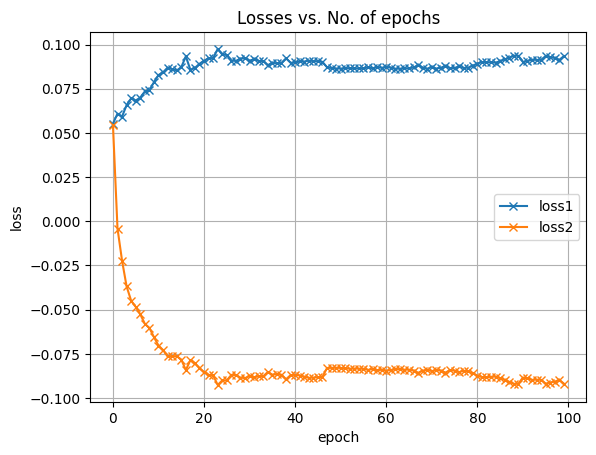

In [7]:
plot_history(history)

In [8]:
torch.save({
            'encoder': model.encoder.state_dict(),
            'decoder1': model.decoder1.state_dict(),
            'decoder2': model.decoder2.state_dict()
            }, "model.pth")

## Testing

In [9]:
checkpoint = torch.load("model.pth")

model.encoder.load_state_dict(checkpoint['encoder'])
model.decoder1.load_state_dict(checkpoint['decoder1'])
model.decoder2.load_state_dict(checkpoint['decoder2'])

<All keys matched successfully>

In [10]:
results=testing(model,test_loader)

In [20]:
windows_labels = np.load('SIM/' + choice + '/' + choice + '_test_label.npy')
# windows_labels=[]
# for i in range(len(labels)-window_size):
#     windows_labels.append(list(np.int_(labels[i:i+window_size])))

In [12]:
y_test = [1.0 if (np.sum(window) > 0) else 0 for window in windows_labels ]

In [13]:
y_pred=np.concatenate([torch.stack(results[:-1]).flatten().detach().cpu().numpy(),
                              results[-1].flatten().detach().cpu().numpy()])

In [22]:
windows_labels.sum()

0

In [18]:
np.array(y_pred).shape

(7608,)

In [14]:
threshold=ROC(y_test,y_pred)

/home/ubuntu/miniforge3/envs/usad/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.